In [1]:
import roverd
from functools import partial
import os
from abstract_dataloader import abstract, generic

In [2]:
meta = {
    "radar": roverd.sensors.XWRRadar,
    "lidar": roverd.sensors.OS0Lidar,
    "camera": roverd.sensors.Camera,
    "_camera": roverd.sensors.Semseg
}

trace = abstract.Trace(
    sensors={
        k: v(os.path.join("/data/grt/bike/point.back", k))
        for k, v in meta.items()
    }, sync=generic.Nearest("lidar", tol=0.1)
)

In [2]:
import time


start = time.perf_counter()

ds = roverd.Dataset.from_config(
    roverd.Dataset.find_traces("/data/grt"),
    sync=generic.Nearest("lidar", tol=0.1),
    sensors={
        "radar": roverd.sensors.XWRRadar,
        "lidar": roverd.sensors.OS0Lidar,
        "camera": roverd.sensors.Camera,
        "_camera": roverd.sensors.Semseg
    })

print(time.perf_counter() - start)

0.19421958713792264


In [4]:
len(ds)

ds[5000]

{'radar': XWRRadarIQ(iq=array([[[[[  56,   94,   55, ..., -122,   39,   98],
           [-177, -182,   24, ...,  247, -149, -184],
           [ 169,  137, -157, ..., -139,  295,  293],
           [ 323,  327, -472, ...,  439, -213, -253]],
 
          [[  32,   35,   30, ...,  -88,  102,   27],
           [  50,   26,  -74, ...,  138, -107, -104],
           [ -87,  -16,  152, ...,  -67,  199,  210],
           [ -40,  -26, -326, ...,  109,  -84,  -81]],
 
          [[  73,  115,   44, ...,   80,  140,  112],
           [-185, -138, -150, ..., -122,  -80,  -99],
           [ 303,  229,   23, ...,   32,   93,  140],
           [-400, -400,   25, ...,   61, -187, -114]]],
 
 
         [[[ 122,  107,   22, ..., -140,   71,   66],
           [-288, -227,  -76, ...,  220, -173, -136],
           [ 190,  151, -129, ..., -117,  290,  263],
           [ 457,  363, -514, ...,  404, -232, -189]],
 
          [[ -27,   24,   31, ...,  -35,   61,   82],
           [  59,   60,   31, ...,  109, -13

In [3]:
sensors = {
    "radar": roverd.sensors.XWRRadar,
    "lidar": roverd.sensors.OS0Lidar,
    # "camera": roverd.sensors.Camera,
    # "_camera": roverd.sensors.Semseg
}


trace = roverd.Trace.from_path("/data/grt/bike/point.back", sensors=sensors, sync=generic.Nearest("lidar", tol=0.1))

In [4]:
trace

Trace(/data/grt/bike/point.back, 12219x[radar, lidar])

In [5]:
trace[10000]

{'radar': XWRRadarIQ(iq=array([[[[[-184,  -97,   -3, ...,  -42,  -54, -182],
           [  -5,  104,  -55, ...,  104,  197,   72],
           [ 132,  127,  -40, ..., -130,   74,  -76],
           [  89,  143,  184, ..., -213,  293,   94]],
 
          [[ -93,  -55,  -96, ...,   35,   68,  -37],
           [ 135,  220,  102, ...,  135,   88,  -84],
           [-261, -197,  -57, ...,  123,    9,  -35],
           [ 249,  226, -235, ...,   -5,   43,  102]],
 
          [[-164, -151,   42, ...,  147,  -10,  -66],
           [ 206,  174, -197, ...,  194,   60,   53],
           [-252, -159,  349, ...,   37, -173,   42],
           [-253, -165, -265, ...,   -8, -216,  167]]],
 
 
         [[[-199, -122,  -30, ...,  -21,  -49, -194],
           [  -4,   71, -119, ...,  106,  198,   72],
           [ 141,  142,  -46, ..., -110,   25,  -82],
           [  88,  141,  224, ..., -182,  301,  128]],
 
          [[-134,  -39, -117, ...,   43,   68,  -28],
           [ 141,  212,  123, ...,  164,   9

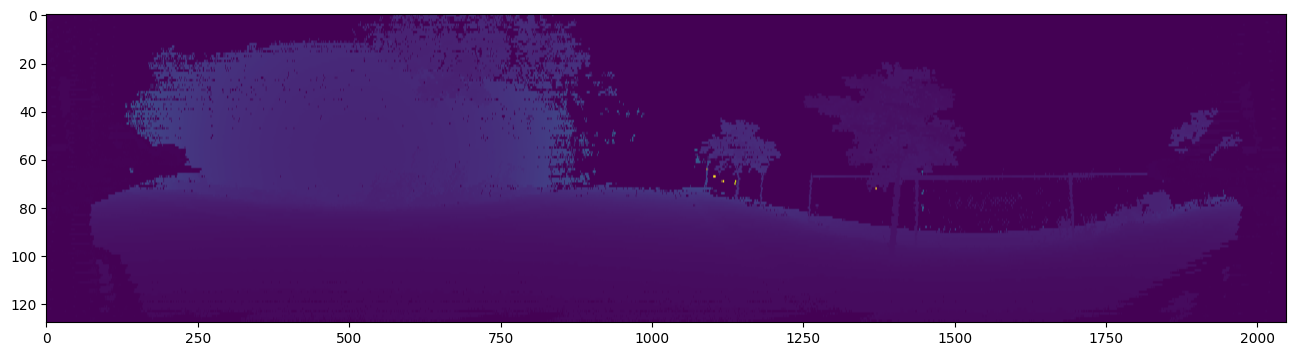

In [36]:
import optree
from matplotlib import pyplot as plt
import numpy as np
import json

from ouster.sdk import client


with open(sample['lidar'].intrinsics) as f:
    intrinsics = f.read()

info = client.SensorInfo(intrinsics)


fig, axs = plt.subplots(1, 1, figsize=(16, 4))
axs.imshow(client.destagger(info, sample['lidar'].rng)[0], aspect='auto')